In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from utils import mnist_reader
from utils.validation import validation_report

Labels = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

N = X_train.shape[0]
batch_size = 32

n_batch = int(N/batch_size)

from keras.utils import to_categorical
y_train_ohe = to_categorical(y_train)

Using TensorFlow backend.


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, MaxPooling2D, Flatten
import keras.metrics as metrics

dropout_rate=0.1

model = Sequential()

model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(10, activation='softmax'))


def top3_acc(ytrue, ypred):
    return metrics.top_k_categorical_accuracy(ytrue, ypred, k=3)

# Change decay for better results

# lr: 1e-3, decay: 0

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.001, decay=0., nesterov=False),
             metrics=[metrics.categorical_accuracy, top3_acc])

In [13]:
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train_ohe, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 28s - loss: 1.1577 - categorical_accuracy: 0.6998 - top3_acc: 0.9182    
Epoch 2/5
60000/60000 [==============================] - 28s - loss: 0.5468 - categorical_accuracy: 0.8029 - top3_acc: 0.9744    
Epoch 3/5
60000/60000 [==============================] - 29s - loss: 0.4813 - categorical_accuracy: 0.8243 - top3_acc: 0.9802    
Epoch 4/5
60000/60000 [==============================] - 29s - loss: 0.4449 - categorical_accuracy: 0.8385 - top3_acc: 0.9826    
Epoch 5/5
60000/60000 [==============================] - 61s - loss: 0.4212 - categorical_accuracy: 0.8466 - top3_acc: 0.9847    


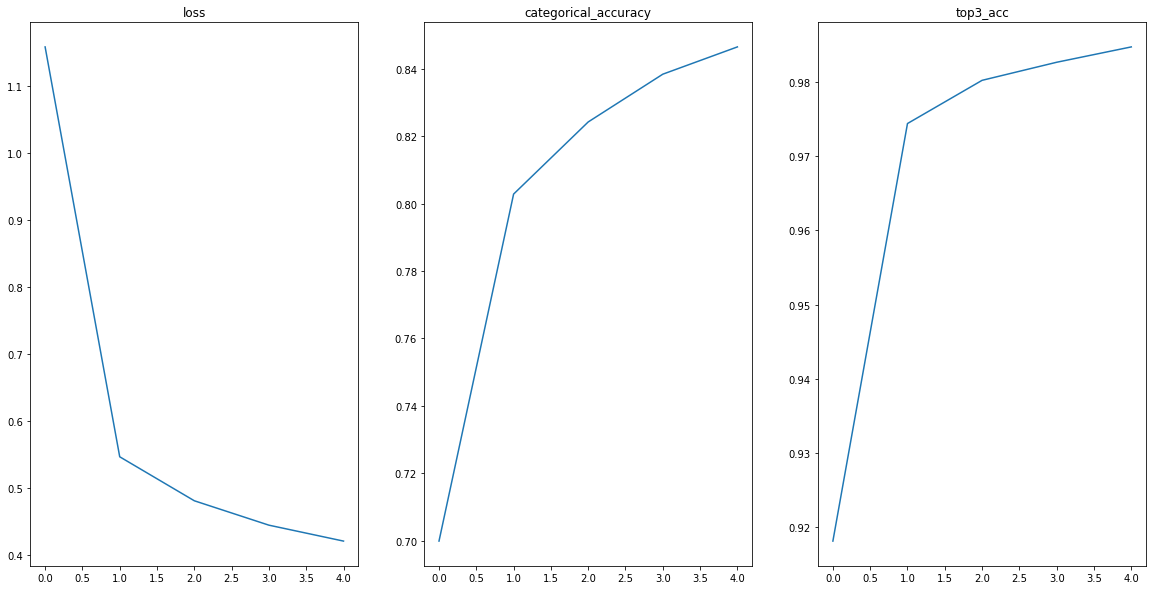

In [16]:
plt.figure(figsize=(20,10))

for i, (name, values) in enumerate(history.history.items()):
    plt.subplot(1, len(history.history.items()), i+1)
    plt.plot(values)
    plt.title(name)

In [15]:
validation_report(test_data=X_test.reshape(-1, 28, 28, 1),
                 test_label=y_test,
                 model=model,
                 names=Labels)

Accuracy: 
0.8363



Confusion matrix: 
[[808   2  25  41   1   1 173   0   7   0]
 [  1 959   0   6   1   0   2   0   1   0]
 [ 20   0 661  10  74   0  92   0  24   2]
 [ 26  18  10 818  21   0  25   0   4   0]
 [  7   8 186  80 814   0 142   0   9   0]
 [  3   0   0   0   0 943   0  30   5  16]
 [128  13 111  41  88   0 543   0   9   0]
 [  0   0   0   0   0  31   0 941   5  41]
 [  7   0   6   4   1   2  23   2 935   0]
 [  0   0   1   0   0  23   0  27   1 941]]



             precision    recall  f1-score   support

T-shirt/top       0.81      0.76      0.79      1058
    Trouser       0.96      0.99      0.97       970
   Pullover       0.66      0.75      0.70       883
      Dress       0.82      0.89      0.85       922
       Coat       0.81      0.65      0.72      1246
     Sandal       0.94      0.95      0.94       997
      Shirt       0.54      0.58      0.56       933
    Sneaker       0.94      0.92      0.93      1018
        Bag       0.94      0.95      0.94      

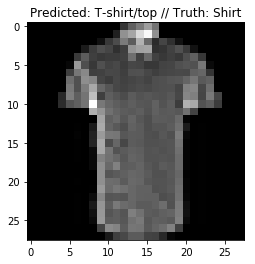

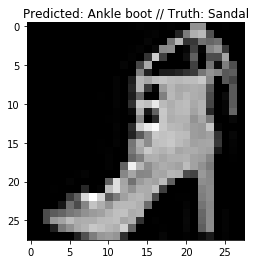

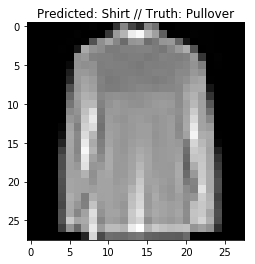

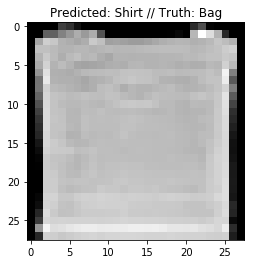

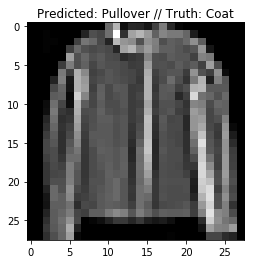

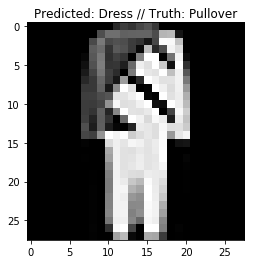

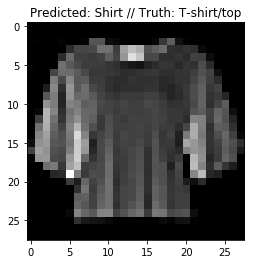

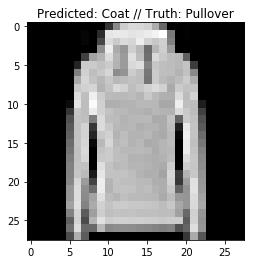

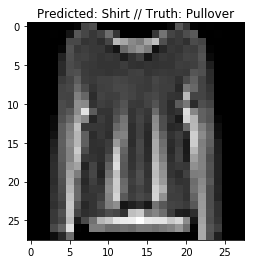

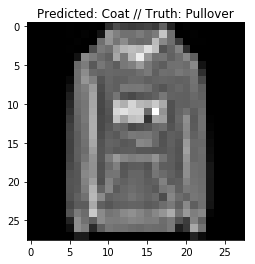

In [21]:
import random


predictions = model.predict(X_test.reshape(-1, 28, 28, 1)).argmax(axis=1)

wrong_predictions = (predictions != y_test)

n_wp = wrong_predictions.sum()

N = 10

for i in range(N):
    
    idx = random.choice(range(n_wp))
    plt.figure()
    plt.imshow(X_test[wrong_predictions,::][idx,::].reshape(28, 28), cmap="gray")
    
    
    plt.title("Predicted: {0} // Truth: {1}".format(
        Labels[predictions[wrong_predictions][idx]],
        Labels[y_test[wrong_predictions][idx]]
    ))